In [1]:
%matplotlib widget

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

In [4]:
# Load the file
who_csv = Path('../Project 1 - Group 3/Resources/WHO-COVID-19-global-data.csv')
layoff_csv = Path('../Project 1 - Group 3/Resources/layoff_2021.csv')
quit_csv = Path('../Project 1 - Group 3/Resources/quit_2021.csv')

# layoff and quit csv are from the Bureau of Labor

# Read data sets for new deaths, layoffs, and voluntary withdrawl
who_data = pd.read_csv(who_csv)
layoff_data = pd.read_csv(layoff_csv)
quit_data = pd.read_csv(quit_csv)


In [45]:
# Clean up layoff data to show only 2021
layoff_data_2021 = layoff_data[layoff_data['Year']==2021]

# Clean up layoff data to include only period and value
layoff_data_2021 = layoff_data_2021[['Period', 'Value']]

# Rename period to month and value to layoff by the thousand
layoff_data_2021 = layoff_data_2021.rename(columns={'Period':'Month', 'Value':'Layoff'})
layoff_data_2021




,Month,Layoff
96,M01,2705
97,M02,2259
98,M03,2086
99,M04,2072
100,M05,1829
101,M06,1814
102,M07,1220
103,M08,1213
104,M09,1094
105,M10,1026


In [44]:
print(layoff_data_2021['Month'].dtype)

object


In [30]:
# Change period into a string then set as index
layoff_data_2021['Period'] = layoff_data_2021['Period'].astype(str)

series.map(layoff_data_2021)

NameError: name 'series' is not defined

In [31]:
# Set 'Date_reported' as the index
who_data = who_data.set_index('Date_reported')

#Convert the index to datetime format
who_data.index=pd.to_datetime(who_data.index)

In [32]:
#Convert the index to datetime format
who_data.index=pd.to_datetime(who_data.index)
who_data['Year'] = who_data.index.year
who_data['Month'] = who_data.index.month
who_data['Day'] = who_data.index.day

who_data

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day
Date_reported,,,,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,2020,1,3
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,2020,1,4
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,2020,1,5
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,2020,1,6
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,2020,1,7
...,...,...,...,...,...,...,...,...,...,...
2023-08-05,ZW,Zimbabwe,AFRO,0,265693,0,5712,2023,8,5
2023-08-06,ZW,Zimbabwe,AFRO,0,265693,0,5712,2023,8,6
2023-08-07,ZW,Zimbabwe,AFRO,0,265693,0,5712,2023,8,7


In [33]:
us_new_deaths = who_data[who_data['Country']=='United States of America']
us_new_deaths

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day
Date_reported,,,,,,,,,,
2020-01-03,US,United States of America,AMRO,0,0,0,0,2020,1,3
2020-01-04,US,United States of America,AMRO,0,0,0,0,2020,1,4
2020-01-05,US,United States of America,AMRO,0,0,0,0,2020,1,5
2020-01-06,US,United States of America,AMRO,0,0,0,0,2020,1,6
2020-01-07,US,United States of America,AMRO,0,0,0,0,2020,1,7
...,...,...,...,...,...,...,...,...,...,...
2023-08-05,US,United States of America,AMRO,0,103436829,0,1127152,2023,8,5
2023-08-06,US,United States of America,AMRO,0,103436829,0,1127152,2023,8,6
2023-08-07,US,United States of America,AMRO,0,103436829,0,1127152,2023,8,7


In [34]:
# Create a new dataframe with only 2021 for the U.S.
us_newdeath_2021 = us_new_deaths[us_new_deaths['Year']==2021]

# Group by month and get the max new deaths 
us_months = us_newdeath_2021.groupby('Month')['New_deaths'].max()
us_months


Month
1     4066
2     5061
3     1924
4      948
5      806
6      586
7      499
8     1837
9     2499
10    2330
11    3867
12    3177
Name: New_deaths, dtype: int64

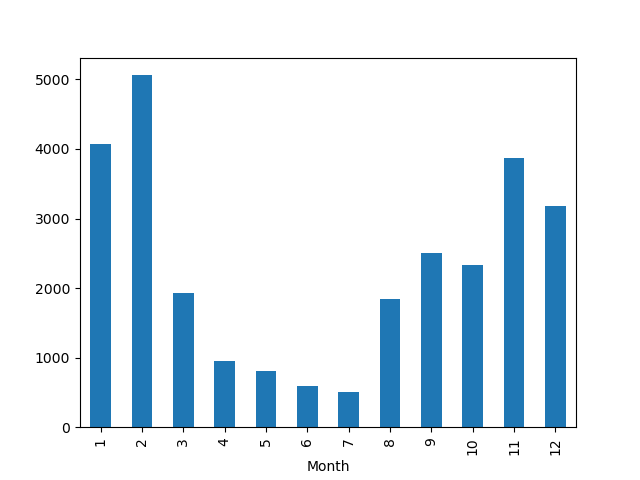

In [35]:
# Plot the bar chart
us_months.plot(kind='bar')
plt.show()